# Importando as bibliotecas necessárias e os Data Frames

In [6]:
!pip install polars
import polars as pl
!pip install pandas
import pandas as pd
import folium
from folium import plugins
import ipywidgets as widgets
from ipywidgets import interact
import altair as alt
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import LabelEncoder
#from sklearn.impute import SimpleImputer
#import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, time
import numpy as np
from pandas_profiling import ProfileReport
from IPython.display import display
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from ydata_profiling import ProfileReport
from dash import dcc, html
#import ydataprocessing as dp
import pandas_profiling
from matplotlib.ticker import FuncFormatter
from folium.plugins import TimestampedGeoJson

# Para carregar o dado direto no pandas - Loading the dataset directly to pandas
fare_attributes = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\fare_attributes.txt")
fare_rules = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\fare_rules.txt")
routes = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\routes.txt")
shapes = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\shapes.txt")
stop_times = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\stop_times.txt")
stops = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\stops.txt")
trips = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\trips.txt")
calendar_dates = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia-de-dados\SOROCABA-gtfs\calendar_dates.txt")

#Clear Bootstrap Logs
from IPython.display import clear_output 
#clear_output()

print("Import Complete!!")

     --------------------------------------- 18.9/18.9 MB 15.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'polars'

# <h1 style="background-color:#6a0dad; color:white">Explorando os Data Frames</h1>

## <span style="color:#6a0dad">Explorando o Data Frame 'fare_attributes'</span>


In [2]:
print(f'O Data Frame tem {fare_attributes.shape[0]} linhas e {fare_attributes.shape[1]} colunas.')

O Data Frame tem 8 linhas e 7 colunas.


In [3]:
fare_attributes.head(10)

,fare_id,price,currency_type,payment_method,transfers,agency_id,transfer_duration
0,21390,4.90,BRL,0,0,1049,NaN
1,21395,5.25,BRL,0,0,1049,NaN
2,21398,6.00,BRL,0,0,1049,NaN
3,21412,5.40,BRL,0,0,1049,NaN
4,21394,5.50,BRL,0,0,1049,NaN
5,21399,6.15,BRL,0,0,1049,NaN
6,21407,5.35,BRL,0,0,1049,NaN
7,21426,5.15,BRL,0,0,1049,NaN


In [4]:
fare_attributes.describe()

,fare_id,price,payment_method,transfers,agency_id,transfer_duration
count,8.000000,8.000000,8.0,8.0,8.0,0.0
mean,21402.625000,5.462500,0.0,0.0,1049.0,NaN
std,11.831405,0.420671,0.0,0.0,0.0,NaN
min,21390.000000,4.900000,0.0,0.0,1049.0,NaN
25%,21394.750000,5.225000,0.0,0.0,1049.0,NaN
50%,21398.500000,5.375000,0.0,0.0,1049.0,NaN
75%,21408.250000,5.625000,0.0,0.0,1049.0,NaN
max,21426.000000,6.150000,0.0,0.0,1049.0,NaN


In [5]:
fare_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_id            8 non-null      int64  
 1   price              8 non-null      float64
 2   currency_type      8 non-null      object 
 3   payment_method     8 non-null      int64  
 4   transfers          8 non-null      int64  
 5   agency_id          8 non-null      int64  
 6   transfer_duration  0 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 576.0+ bytes


In [6]:
fare_attributes = fare_attributes.drop('transfer_duration', axis=1)

In [7]:
fare_attributes

,fare_id,price,currency_type,payment_method,transfers,agency_id
0,21390,4.90,BRL,0,0,1049
1,21395,5.25,BRL,0,0,1049
2,21398,6.00,BRL,0,0,1049
3,21412,5.40,BRL,0,0,1049
4,21394,5.50,BRL,0,0,1049
5,21399,6.15,BRL,0,0,1049
6,21407,5.35,BRL,0,0,1049
7,21426,5.15,BRL,0,0,1049


In [8]:
valores_ausentes_fare_attributes = fare_attributes.isna()
contagem = valores_ausentes_fare_attributes.sum()
print(contagem)

fare_id           0
price             0
currency_type     0
payment_method    0
transfers         0
agency_id         0
dtype: int64


### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>
- Esse é um data frame meramente informativo apenas com identificações de tarifas e seus respectivos valores, vamos ter que cruzar esses dados com outros data frames para termos uma informação relevante
- Mais na frente vamos cruzar esse Data Frame com o próximo, fare_rules. Primeiro vamos fazer a exploração dos seus dados

## <span style="color:#6a0dad">Explorando o Data Frame 'fare_rules'</span>


In [9]:
print(f'O Data Frame tem {fare_rules.shape[0]} linhas e {fare_rules.shape[1]} colunas.')

O Data Frame tem 13 linhas e 2 colunas.


In [10]:
fare_rules.head(13)

,fare_id,route_id
0,21390,c73df358-1a6d-4ff2-adf4-b1f3a1477344
1,21395,72b3e29b-10df-4bce-854a-582d115a99a4
2,21398,134ccc43-722d-433d-9e56-7bd03d985403
3,21390,1cf3a839-8147-4730-b0b6-5c52c4030a7b
4,21412,0e6d74dd-a14e-40b3-ac59-720498612889
5,21395,81399e03-dcaa-4255-858d-d3e81e69157d
6,21412,5396e018-5cca-4291-8622-c50f2ac15b41
7,21390,142cbd21-198a-4b79-8bb6-755ef1eee5e7
8,21394,aa595240-5ef2-4e2d-a2f7-300976b1dcbf
9,21395,90588e02-a842-4427-b7b1-6321737e7972


### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>
- Esse é outro frame de referência o arquivo fare_rules contém informações sobre as regras de tarifas que se aplicam a viagens em uma rede de transporte público. Cada linha do arquivo corresponde a uma regra de tarifa que se aplica a uma ou mais viagens em uma ou mais rotas.
- Vamos combiná-lo com o arquivo fare_attributes para vermos como as tarifas são distribuídas por rotas.
- De antemão podemos verificar que o data frame pode não estar completo pois há muito mais rotas disponíveis no arquivo routes.txt que nesse, há uma diferença de 110 linhas de ônibus (123 linhas no data frame routes e 13 linhas no data frame fare_rules)

## <span style="color:#6a0dad">Explorando o Data Frame 'routes'</span>


In [11]:
print(f'O Data Frame tem {routes.shape[0]} linhas e {routes.shape[1]} colunas.')

O Data Frame tem 123 linhas e 8 colunas.


In [12]:
routes.describe()

,agency_id,route_desc,route_type,route_color,route_text_color
count,123.0,0.0,123.0,0.0,0.0
mean,1049.0,NaN,3.0,NaN,NaN
std,0.0,NaN,0.0,NaN,NaN
min,1049.0,NaN,3.0,NaN,NaN
25%,1049.0,NaN,3.0,NaN,NaN
50%,1049.0,NaN,3.0,NaN,NaN
75%,1049.0,NaN,3.0,NaN,NaN
max,1049.0,NaN,3.0,NaN,NaN


In [13]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color
0,9cf1742a-6bc8-4a32-9856-83b9a77b6554,1049,E130,São Camilo - Terminal Santo Antônio,NaN,3,NaN,NaN
1,7d9af57b-c92e-4f02-8f66-ce6fa6986219,1049,E120,Paineiras - Terminal Santo Antônio,NaN,3,NaN,NaN
2,e2a31ffe-1f93-4c87-a1fc-eb26c0838ac3,1049,A130,Estação Itavuvu - São Camilo,NaN,3,NaN,NaN
3,7b3ccb02-150e-4083-b8cd-be37e5a2252c,1049,E160,São Bento - Terminal Santo Antônio,NaN,3,NaN,NaN
4,af542db6-a91d-4240-8c89-fa8141272e7a,1049,A110,Terminal Vitória Régia - Vitória Régia Ii E Iii,NaN,3,NaN,NaN


In [14]:
# Fazendo o drop de colunas não utilizadas

routes = routes.drop(['route_desc','route_color','route_text_color'], axis=1)

In [15]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   route_id          123 non-null    object
 1   agency_id         123 non-null    int64 
 2   route_short_name  123 non-null    object
 3   route_long_name   123 non-null    object
 4   route_type        123 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.9+ KB


In [16]:
valores_ausentes_routes = routes.isna()
contagem = valores_ausentes_routes.sum()
print(contagem)

route_id            0
agency_id           0
route_short_name    0
route_long_name     0
route_type          0
dtype: int64


### Gerando o relatório exploratório do 'routes' em HTML

In [17]:
relatorio_routes = ProfileReport(routes, title='Relatorio routes')
relatorio_routes.to_file('routes.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>
- Esse é outro frame de referência o arquivo routes contém todas as rotas disponíveis na cidade de Sorocaba. São 123 linhas de ônibus.
- Não é possível combiná-lo com os arquivos anteriores pois esse arquivos possui muitas linhas de ônibus a mais.
- Vamos usá-lo como referência para identificar com mais facilidade as rotas de outros data frames

## <span style="color:#6a0dad">Explorando o Data Frame 'shapes'</span>


In [18]:
print(f'O Data Frame tem {shapes.shape[0]} linhas e {shapes.shape[1]} colunas.')

O Data Frame tem 101613 linhas e 4 colunas.


In [19]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45222,-47.50530,0
1,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45262,-47.50570,1
2,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45320,-47.50507,2
3,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45288,-47.50475,3
4,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45253,-47.50436,4


In [20]:
# Colocando o shapre_pt_sequence como índice

shapes = shapes.set_index('shape_pt_sequence')

In [21]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon
shape_pt_sequence,,,
0,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45222,-47.50530
1,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45262,-47.50570
2,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45320,-47.50507
3,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45288,-47.50475
4,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45253,-47.50436


In [22]:
shapes.describe()

,shape_pt_lat,shape_pt_lon
count,101613.000000,101613.000000
mean,-23.478081,-47.449801
std,0.040143,0.047021
min,-23.583650,-47.563070
25%,-23.503910,-47.481910
50%,-23.484330,-47.456630
75%,-23.452790,-47.423640
max,-23.352900,-47.282760


In [23]:
shapes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101613 entries, 0 to 84
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   shape_id      101613 non-null  object 
 1   shape_pt_lat  101613 non-null  float64
 2   shape_pt_lon  101613 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.1+ MB


In [24]:
# Contando quantos shape_id's existem nesse data frame.

contagem_shape_id = shapes['shape_id'].value_counts()
print(f"O data frame possui {contagem_shape_id.shape[0]} shape_id's.")

O data frame possui 628 shape_id's.


### Gerando o relatório exploratório do 'shapes' em HTML

In [25]:
relatorio_shapes = ProfileReport(shapes, title='Relatorio shapes')
relatorio_shapes.to_file('shapes.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\marcf\anaconda3\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>

- Esse data frame serve para explicitar todas shape_id's, que é um identificador único para cada trajeto (rota) que um veículo de transporte público segue. Cada trajeto pode ser composto por um ou mais segmentos de linhas retas (conhecidos como "shapes"), que são definidos por uma sequência de pares de coordenadas de latitude e longitude.

## <span style="color:#6a0dad">Explorando o Data Frame 'stop_times'</span>


In [26]:
print(f'O Data Frame tem {stop_times.shape[0]} linhas e {stop_times.shape[1]} colunas.')

O Data Frame tem 1175854 linhas e 5 colunas.


In [27]:
stop_times.head(30)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:40:00,23:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1
1,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:41:39,23:41:39,032dcd58-6609-11ed-98db-5adc55d213d0,2
2,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:42:42,23:42:42,032e526c-6609-11ed-98db-5adc55d213d0,3
3,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:43:56,23:43:56,032eba14-6609-11ed-98db-5adc55d213d0,4
4,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:45:36,23:45:36,032f8569-6609-11ed-98db-5adc55d213d0,5
5,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:46:47,23:46:47,033000ed-6609-11ed-98db-5adc55d213d0,6
6,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:47:49,23:47:49,03306740-6609-11ed-98db-5adc55d213d0,7
7,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:48:40,23:48:40,0330d1ce-6609-11ed-98db-5adc55d213d0,8
8,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:49:17,23:49:17,03311b69-6609-11ed-98db-5adc55d213d0,9
9,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:49:42,23:49:42,03311cb1-6609-11ed-98db-5adc55d213d0,10


In [28]:
filtered_df = stop_times.loc[stop_times['trip_id'] == '0851e750-59eb-4a61-b1cd-e4e8eeb14f70_100817175']
filtered_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
1081067,0851e750-59eb-4a61-b1cd-e4e8eeb14f70_100817175,08:05:00,08:05:00,030c6f5b-6609-11ed-98db-5adc55d213d0,1
1081068,0851e750-59eb-4a61-b1cd-e4e8eeb14f70_100817175,08:06:17,08:06:17,030c9144-6609-11ed-98db-5adc55d213d0,2


### Limpando a data frame

In [29]:
# Fazendo o replace de 24:00 por 00:00

stop_times['arrival_time'] = stop_times['arrival_time'].str.replace('24:', '00:')
stop_times['departure_time'] = stop_times['departure_time'].str.replace('24:', '00:')

In [30]:
# Transformando o as datas no data frame para o formato date time

stop_times['arrival_time'] = pd.to_datetime(stop_times['arrival_time'], format='%H:%M:%S').dt.time
stop_times['departure_time'] = pd.to_datetime(stop_times['departure_time'], format='%H:%M:%S').dt.time

In [31]:
# Contando a quantidade de trip_id's no data frame

conta_trip_id = stop_times['trip_id'].value_counts()
print(f"O data frame tem {conta_trip_id.shape[0]} trip_id's.")

O data frame tem 46311 trip_id's.


In [32]:
# Inicializa contador de linhas removidas
lines_removed = 0

#Inicializa o contador de linhas com viegens menores que 5 minutos
trips_less_than_5min = 0

# Faz o groupby por trip_id
grouped = stop_times.groupby('trip_id')

# Itera sobre cada grupo
for trip_id, group in grouped:
    # Pega o primeiro e último stop_sequence do grupo
    first_stop = group[group['stop_sequence'] == group['stop_sequence'].min()]
    last_stop = group[group['stop_sequence'] == group['stop_sequence'].max()]
    
    # Lê o departure_time do primeiro stop_sequence
    first_time = pd.to_datetime(first_stop['departure_time'].iloc[0], format='%H:%M:%S')
    
    # Lê o arrival_time do último stop_sequence
    last_time = pd.to_datetime(last_stop['arrival_time'].iloc[0], format='%H:%M:%S')
    
    # Calcula a diferença entre os tempos em minutos
    total_travel_time = (last_time - first_time).seconds / 60
    
    # Verifica se o total_travel_time é maior que 1000
    if total_travel_time > 1000 or total_travel_time < 1:
        # Exclui todas as linhas desse trip_id do data frame
        stop_times.drop(group.index, inplace=True)
        lines_removed += len(group.index)
    elif total_travel_time < 5:
        # Incrementa o contador de viagens com menos de 5 minutos
        trips_less_than_5min += 1

# Exibe o total de linhas removidas
print(f'Total de linhas removidas: {lines_removed}')


Total de linhas removidas: 8469


In [33]:
stop_times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167385 entries, 0 to 1175853
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   trip_id         1167385 non-null  object
 1   arrival_time    1167385 non-null  object
 2   departure_time  1167385 non-null  object
 3   stop_id         1167385 non-null  object
 4   stop_sequence   1167385 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 53.4+ MB


### Gráfico 1 - stop_times - Horários de chegada em cada parada para uma determinada trip_id:

In [34]:
# Criando o dropdown com as opções de trip_id
trip_id_options_1 = list(trips['trip_id'])

# Criando a função para plotar o gráfico
def plot_trip_schedule(trip_id):
    # Filtrando as informações da tabela de horários para o ID da viagem selecionada
    trip_stop_times = stop_times[stop_times['trip_id'] == trip_id].sort_values('stop_sequence')

    # Convertendo as strings de horários em objetos datetime
    trip_stop_times['arrival_time'] = pd.to_datetime(trip_stop_times['arrival_time'].astype(str))
    trip_stop_times['departure_time'] = pd.to_datetime(trip_stop_times['departure_time'].astype(str))

    # Criando listas com os horários de chegada e partida de cada parada
    arrival_times = [stop_time.arrival_time.strftime('%H:%M:%S') for stop_time in trip_stop_times.itertuples()]
    departure_times = [stop_time.departure_time.strftime('%H:%M:%S') for stop_time in trip_stop_times.itertuples()]

    # Criando o gráfico
    plt.plot(arrival_times, 'o--', label='Chegada')
    plt.plot(departure_times, 'o--', label='Partida')

    # Definindo as legendas dos eixos
    plt.xlabel('Paradas')
    plt.ylabel('Horário')
    plt.title(f'Horário de chegada e partida para a viagem {trip_id}')
    plt.legend()
    plt.show()


# Criando o dropdown
interact(plot_trip_schedule, trip_id=trip_id_options_1);

interactive(children=(Dropdown(description='trip_id', options=('368d3558-ce36-41fd-9f62-8389be0f833d_92960947'…

### Gráfico 2 - departure_times - Horários de partida em cada parada para uma determinada trip_id:

In [35]:
# Criando o dropdown com as opções de trip_id
trip_id_options_2 = list(trips['trip_id'])

#@interact(trip_id=trips_df['trip_id'])
def plot_trip_schedule(trip_id):
    # Filtrando as informações da tabela de horários para o ID da viagem selecionada
    trip_stop_times = stop_times[stop_times['trip_id'] == trip_id].sort_values('stop_sequence')
    
    # Convertendo as strings de horários em objetos datetime
    trip_stop_times['arrival_time'] = pd.to_datetime(trip_stop_times['arrival_time'].astype(str))
    trip_stop_times['departure_time'] = pd.to_datetime(trip_stop_times['departure_time'].astype(str))
    
    # Extraindo as informações de chegada e partida de cada parada
    stop_names = trip_stop_times['stop_id'].tolist()
    arrival_times = [stop_time.arrival_time.strftime('%H:%M:%S') for stop_time in trip_stop_times.itertuples()]
    departure_times = [stop_time.departure_time.strftime('%H:%M:%S') for stop_time in trip_stop_times.itertuples()]
    
    # Criando o gráfico
    plt.figure(figsize=(12, 8))
    plt.plot(arrival_times, stop_names, 'o--', label='Chegada')
    plt.plot(departure_times, stop_names, 'o--', label='Partida')
    
    # Definindo as legendas dos eixos
    plt.xlabel('Horário')
    plt.xticks(rotation=45)
    plt.ylabel('Parada')
    
    # Definindo o título do gráfico
    plt.title('Horários de chegada e partida por parada para a viagem {}'.format(trip_id))
    
    # Exibindo a legenda
    plt.legend()
    
    # Exibindo o gráfico
    plt.show()
    
# Criando o dropdown
interact(plot_trip_schedule, trip_id=trip_id_options_2);

interactive(children=(Dropdown(description='trip_id', options=('368d3558-ce36-41fd-9f62-8389be0f833d_92960947'…

### Gráfico 3 - Tempo médio de espera em cada parada para uma determinada trip_id:

In [36]:
# Criando o dropdown com as opções de trip_id
trip_id_options_3 = list(trips['trip_id'])

def plot_stop_times(trip_id):
    # Filtra o dataframe para a trip_id selecionada
    stop_times_trip = stop_times.loc[stop_times['trip_id'] == trip_id].copy()
    
    # Convertendo as strings de horários em objetos datetime
    stop_times_trip['arrival_time'] = pd.to_datetime(stop_times_trip['arrival_time'], format='%H:%M:%S')
    stop_times_trip['departure_time'] = pd.to_datetime(stop_times_trip['departure_time'], format='%H:%M:%S')
    
    # Calcula o tempo de espera em cada parada em minutos
    wait_time = (stop_times_trip.reset_index().arrival_time -
                 stop_times_trip.shift().reset_index().arrival_time) / pd.Timedelta(minutes=1)
    
    # Cria o gráfico
    fig, ax = plt.subplots(figsize=(12,8))
    ax.bar(stop_times_trip.index[1:], wait_time[1:], width=0.5)
    
    # Configurações do gráfico
    ax.set_title(f"Tempo médio de espera na linha {stop_times_trip.iloc[0]['trip_id']}")
    ax.set_xlabel("Parada")
    ax.set_ylabel("Tempo de espera (minutos)")
    ax.set_ylim(bottom=0)
    ax.grid(True, axis='y')
    ax.set_axisbelow(True)

    # Convertendo o eixo y em minutos
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}:{x%1*60:02.0f} min'))

    # Exibe o gráfico
    plt.show()

# Criando o dropdown
interact(plot_stop_times, trip_id=trip_id_options_3);


interactive(children=(Dropdown(description='trip_id', options=('368d3558-ce36-41fd-9f62-8389be0f833d_92960947'…

### Gráfico 4 - Tempo médio das 10 viagens mais compridas por trip_id:

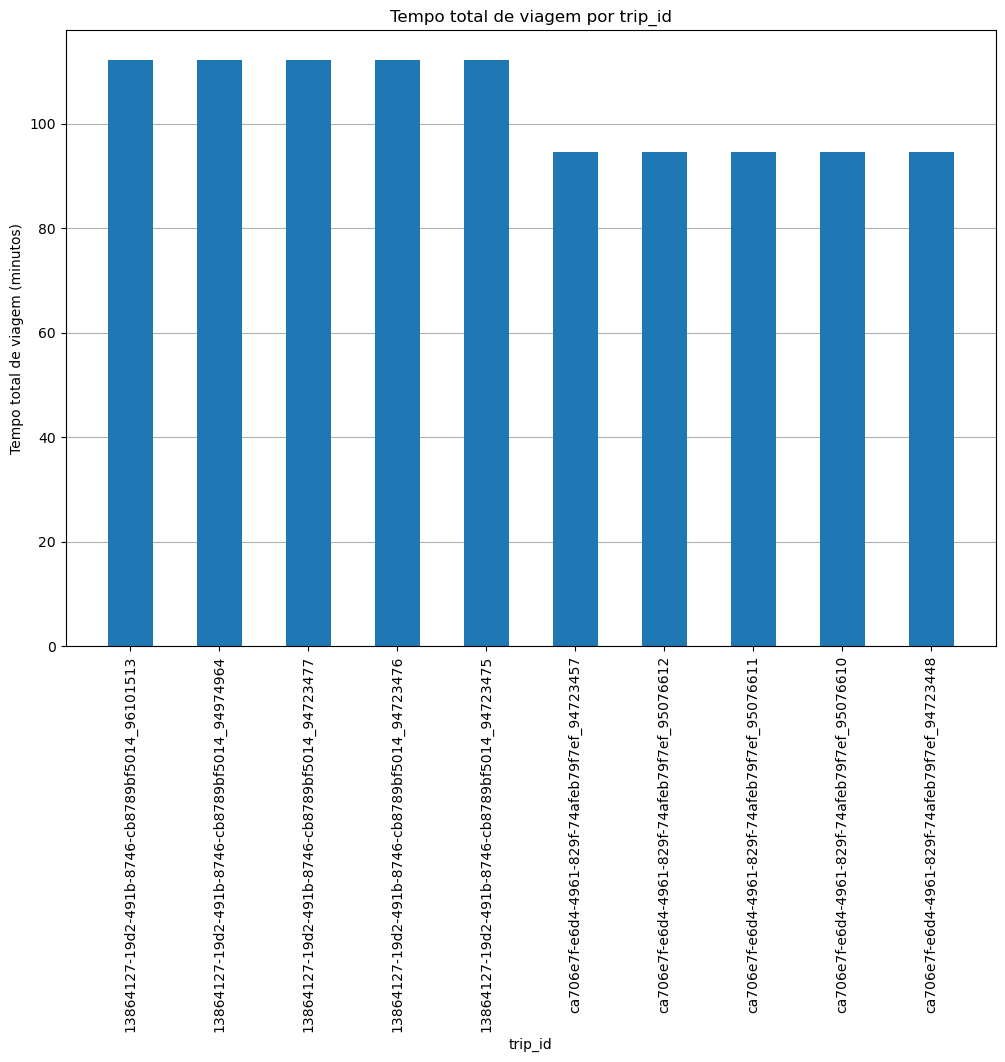

In [37]:
# Agrupa os dados por trip_id e calcula o primeiro departure_time e o último arrival_time
stop_times_grouped = stop_times.groupby('trip_id').agg({'departure_time': 'first', 'arrival_time': 'last'})

# Calcula o tempo total de viagem em minutos
stop_times_grouped['total_travel_time'] = (pd.to_datetime(stop_times_grouped['arrival_time'], format='%H:%M:%S') - pd.to_datetime(stop_times_grouped['departure_time'], format='%H:%M:%S')).dt.seconds / 60

# Ordena os resultados em ordem decrescente e pega as 10 primeiras linhas
top_10_longest_trips = stop_times_grouped.sort_values('total_travel_time', ascending=False).head(10)

# Cria o gráfico de barras
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_longest_trips.index, top_10_longest_trips['total_travel_time'], width=0.5)

# Configurações do gráfico
ax.set_title("Tempo total de viagem por trip_id")
ax.set_xlabel("trip_id")
ax.set_ylabel("Tempo total de viagem (minutos)")
ax.tick_params(axis='x', labelrotation=90)
ax.set_axisbelow(True)
ax.grid(True, axis='y')

# Exibe o gráfico
plt.show()

In [38]:
top_10_trips = stop_times_grouped.nlargest(10, 'total_travel_time')
top_10_trips

,departure_time,arrival_time,total_travel_time
trip_id,,,
13864127-19d2-491b-8746-cb8789bf5014_94723475,23:05:00,00:57:17,112.283333
13864127-19d2-491b-8746-cb8789bf5014_94723476,23:05:00,00:57:17,112.283333
13864127-19d2-491b-8746-cb8789bf5014_94723477,23:05:00,00:57:17,112.283333
13864127-19d2-491b-8746-cb8789bf5014_94974964,23:05:00,00:57:17,112.283333
13864127-19d2-491b-8746-cb8789bf5014_96101513,23:05:00,00:57:17,112.283333
ca706e7f-e6d4-4961-829f-74afeb79f7ef_101641604,11:35:00,13:09:36,94.600000
ca706e7f-e6d4-4961-829f-74afeb79f7ef_101641605,14:25:00,15:59:36,94.600000
ca706e7f-e6d4-4961-829f-74afeb79f7ef_101641606,17:15:00,18:49:36,94.600000
ca706e7f-e6d4-4961-829f-74afeb79f7ef_110906768,11:35:00,13:09:36,94.600000


### Gráfico 5 - Tempo médio das 10 viagens mais curtas por trip_id:

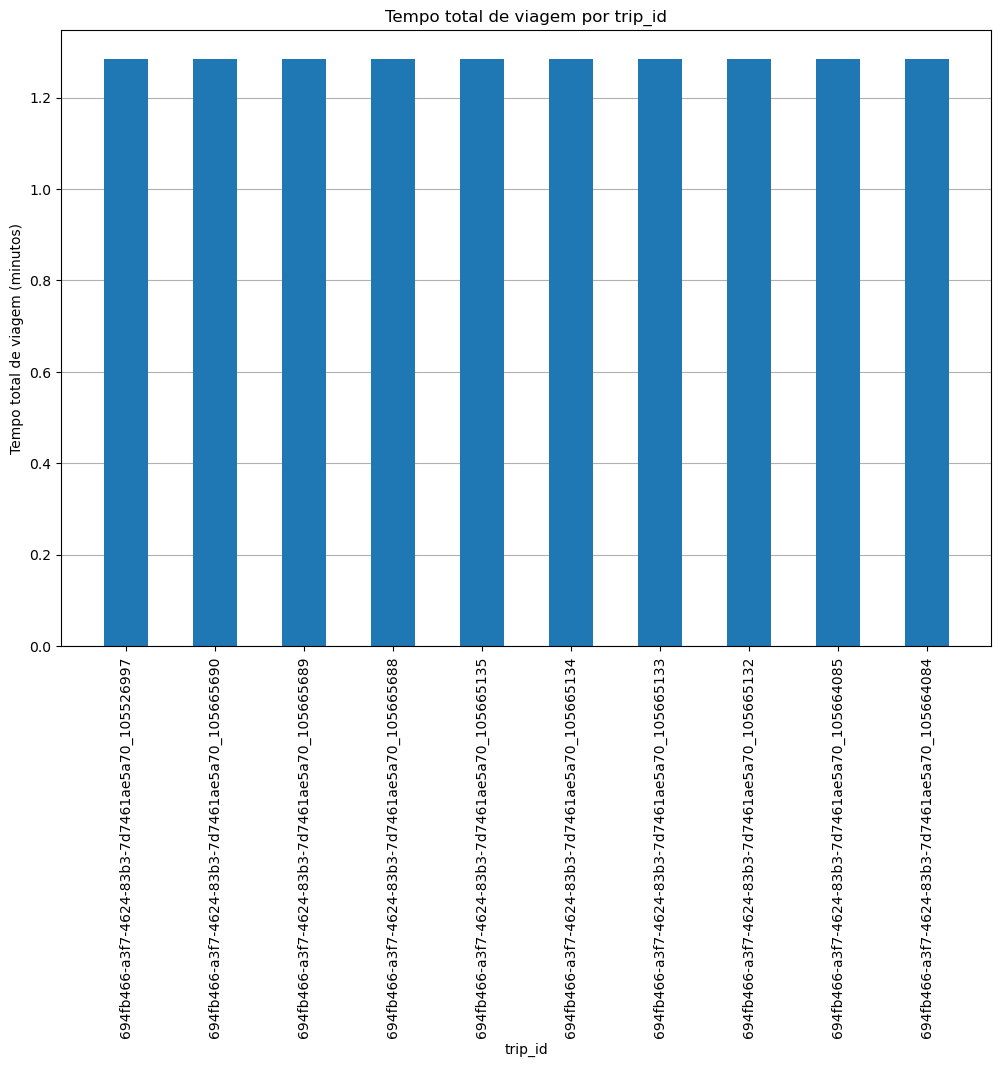

In [39]:
# Agrupa os dados por trip_id e calcula o primeiro departure_time e o último arrival_time
stop_times_grouped = stop_times.groupby('trip_id').agg({'departure_time': 'first', 'arrival_time': 'last'})

# Calcula o tempo total de viagem em minutos
stop_times_grouped['total_travel_time'] = (pd.to_datetime(stop_times_grouped['arrival_time'], format='%H:%M:%S') - pd.to_datetime(stop_times_grouped['departure_time'], format='%H:%M:%S')).dt.seconds / 60

# Ordena os resultados em ordem decrescente e pega as 10 primeiras linhas
top_10_shortest_trips = stop_times_grouped.sort_values('total_travel_time', ascending=True).head(10)

# Cria o gráfico de barras
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_shortest_trips.index, top_10_shortest_trips['total_travel_time'], width=0.5)

# Configurações do gráfico
ax.set_title("Tempo total de viagem por trip_id")
ax.set_xlabel("trip_id")
ax.set_ylabel("Tempo total de viagem (minutos)")
ax.tick_params(axis='x', labelrotation=90)
ax.set_axisbelow(True)
ax.grid(True, axis='y')

# Exibe o gráfico
plt.show()

In [40]:
bottom_10_trips = stop_times_grouped.nsmallest(10, 'total_travel_time')
bottom_10_trips

,departure_time,arrival_time,total_travel_time
trip_id,,,
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_100746118,08:05:00,08:06:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_100817175,08:05:00,08:06:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_100966175,08:05:00,08:06:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_112048407,05:26:00,05:27:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_112048408,06:40:00,06:41:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_112048409,08:00:00,08:01:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_112048410,09:30:00,09:31:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_112048411,10:50:00,10:51:17,1.283333
0851e750-59eb-4a61-b1cd-e4e8eeb14f70_112962139,12:10:00,12:11:17,1.283333


In [41]:
#Gerando o relatório exploratório do 'stop_times' em HTML

relatorio_stop_times = ProfileReport(stop_times, title='Relatorio stop_times')
relatorio_stop_times.to_file('stop_times.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>

- Esse data frame também é interessante na coleta de dados temporais, nós conseguimos fazer uma coleta de dados de paradas dos ônibus.
- Pudemos ver o tempo de parada de cada ônibus.
- Ainda não podemos ter muitas conclusões definitivas com esse data frame, ainda faltam informações importantes para termos uma análise mais apurada.
- um dos problemas encontrados é a poluição do data frame, há viagens de quase 24 horas horas em função de má coleta de dados, em outros casos, há viagens de menos de 1 minuto pelo mesmo problema. Consegui identificar ainda viagens só com uma parada e com menos de um minuto de viagem.
- Vamos cruzar essas informações com outros data frames em um outro momento.

## <span style="color:#6a0dad">Explorando o Data Frame 'stops'</span>

In [42]:
print(f'O Data Frame tem {stops.shape[0]} linhas e {stops.shape[1]} colunas.')

O Data Frame tem 3512 linhas e 9 colunas.


In [43]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station
0,032d12a4-6609-11ed-98db-5adc55d213d0,NaN,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,NaN,-23.453080,-47.505257,NaN,0,NaN
1,032dcd58-6609-11ed-98db-5adc55d213d0,NaN,"Estr. do Dinorah, 404 - Lot. Dinora Rosa, Soro...",NaN,-23.448650,-47.504444,NaN,0,NaN
2,032e526c-6609-11ed-98db-5adc55d213d0,NaN,"Estr. do Dinorah, 97-109 - Lot. Dinora Rosa, S...",NaN,-23.445818,-47.504887,NaN,0,NaN
3,032eba14-6609-11ed-98db-5adc55d213d0,NaN,"Avenida Vinícius de Moraes, 201",NaN,-23.442480,-47.505320,NaN,0,NaN
4,032f8569-6609-11ed-98db-5adc55d213d0,NaN,"Av. Vinícius de Moraes, 501-549 - Parque São B...",NaN,-23.437971,-47.505177,NaN,0,NaN


In [44]:
stops.describe()

,stop_code,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station
count,0.0,0.0,3512.000000,3512.000000,0.0,3512.0,0.0
mean,NaN,NaN,-23.476621,-47.455528,NaN,0.0,NaN
std,NaN,NaN,0.038127,0.050361,NaN,0.0,NaN
min,NaN,NaN,-23.583075,-47.563020,NaN,0.0,NaN
25%,NaN,NaN,-23.504027,-47.492478,NaN,0.0,NaN
50%,NaN,NaN,-23.480617,-47.464620,NaN,0.0,NaN
75%,NaN,NaN,-23.451412,-47.428943,NaN,0.0,NaN
max,NaN,NaN,-23.353216,-47.282970,NaN,0.0,NaN


In [45]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_id         3512 non-null   object 
 1   stop_code       0 non-null      float64
 2   stop_name       3512 non-null   object 
 3   stop_desc       0 non-null      float64
 4   stop_lat        3512 non-null   float64
 5   stop_lon        3512 non-null   float64
 6   stop_url        0 non-null      float64
 7   location_type   3512 non-null   int64  
 8   parent_station  0 non-null      float64
dtypes: float64(6), int64(1), object(2)
memory usage: 247.1+ KB


In [46]:
stops = stops.drop(['stop_code','stop_desc','stop_url','parent_station'], axis=1)

### Gráfico 6 - todas a paradas da cidade de Sorocaba

In [47]:
# Criando o mapa
sorocaba_map = folium.Map(location=[-23.4969, -47.4458], zoom_start=12)

# Adicionando um marcador para cada ponto de parada com latitude disponível
for index, row in stops.iterrows():
    if not pd.isna(row['stop_lat']):
        folium.Marker([row['stop_lat'], row['stop_lon']]).add_to(sorocaba_map)

# Exibindo o mapa
sorocaba_map

In [48]:
#Gerando o relatório exploratório do 'stops' em HTML

relatorio_stops = ProfileReport(stops, title='Relatorio stops')
relatorio_stops.to_file('stops.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\marcf\anaconda3\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>

- Esse é um Data Frame meramente de tradução, ele coloca a latitude e a longitude das paradas dos ônibus por stop_id e coloca o nome dessas paradas.

## <span style="color:#6a0dad">Explorando o Data Frame 'trips'</span>

In [49]:
print(f'O Data Frame tem {trips.shape[0]} linhas e {trips.shape[1]} colunas.')

O Data Frame tem 46311 linhas e 6 colunas.


In [50]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230429,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,São Bento,0,368d3558-ce36-41fd-9f62-8389be0f833d
1,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230427,368d3558-ce36-41fd-9f62-8389be0f833d_96538600,São Bento,0,368d3558-ce36-41fd-9f62-8389be0f833d
2,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230427,368d3558-ce36-41fd-9f62-8389be0f833d_96538477,São Bento,0,368d3558-ce36-41fd-9f62-8389be0f833d
3,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230430,368d3558-ce36-41fd-9f62-8389be0f833d_93997326,São Bento,0,368d3558-ce36-41fd-9f62-8389be0f833d
4,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230426,368d3558-ce36-41fd-9f62-8389be0f833d_94321540,São Bento,0,368d3558-ce36-41fd-9f62-8389be0f833d


In [51]:
trips = trips[['shape_id', 'route_id', 'service_id', 'trip_id', 'trip_headsign', 'direction_id']]

In [52]:
trips.describe()

,direction_id
count,46311.000000
mean,0.473494
std,0.499302
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [53]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46311 entries, 0 to 46310
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   shape_id       46311 non-null  object
 1   route_id       46311 non-null  object
 2   service_id     46311 non-null  object
 3   trip_id        46311 non-null  object
 4   trip_headsign  46311 non-null  object
 5   direction_id   46311 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [54]:
contagem_shape_id_2 = trips['shape_id'].value_counts()
contagem_shape_id_2.shape

(628,)

In [55]:
contagem_trip_id = trips['trip_id'].value_counts()
contagem_trip_id.shape

(46311,)

### Gráfico 7 - número de viagens por rota:

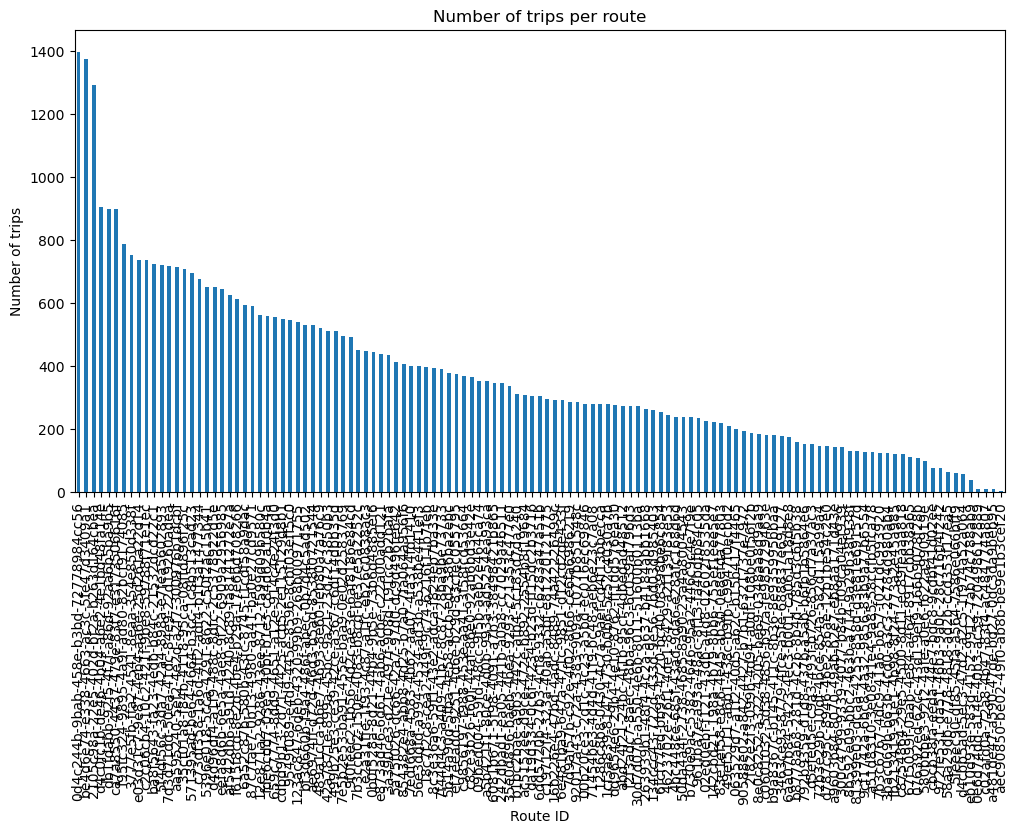

In [56]:

trip_counts = trips.groupby('route_id')['trip_id'].nunique().sort_values(ascending=False)

# plot the bar graph
trip_counts.plot.bar(figsize=(12,6))
plt.title('Number of trips per route')
plt.xlabel('Route ID')
plt.ylabel('Number of trips')
plt.show()

### Gráfico 8 - número de shape_id por rota:

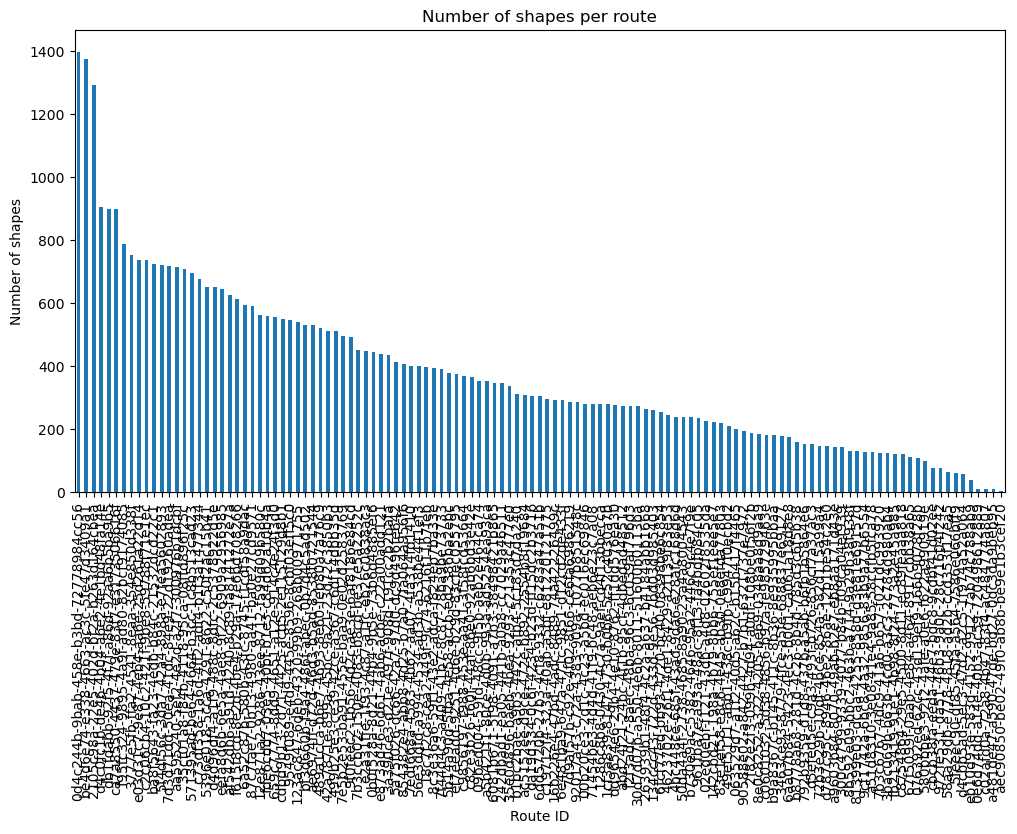

In [57]:
#Plot exploratório

shape_counts = trips.groupby('route_id')['shape_id'].nunique().sort_values(ascending=False)

# plot the bar graph
trip_counts.plot.bar(figsize=(12,6))
plt.title('Number of shapes per route')
plt.xlabel('Route ID')
plt.ylabel('Number of shapes')
plt.show()

In [58]:
#Gerando o relatório exploratório do 'trips' em HTML

relatorio_trips = ProfileReport(trips, title='Relatorio trips')
relatorio_trips.to_file('trips.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>

- Esse é um Data Frame bastente importante, aqui estão concentradas todas as informações de rotas, viagens, shapes e service_id.
- Não conseguimos extrair muitos inputs desse data frame por si só, mas podemos pegar insights para outras análises
- Vamos agregar quase todos os demais data frames aqui para podermos ter o princípio de uma análise global e os fundamentos dor targets para machine learning.

## <span style="color:#6a0dad">Explorando o Data Frame 'calendar_dates'</span>

In [59]:
print(f'O Data Frame tem {calendar_dates.shape[0]} linhas e {calendar_dates.shape[1]} colunas.')

O Data Frame tem 32740 linhas e 3 colunas.


In [60]:
calendar_dates.head()

,service_id,date,exception_type
0,1001-53153-20230429,20230429,1
1,1001-53153-20230427,20230427,1
2,1001-53153-20230430,20230430,1
3,1001-53153-20230426,20230426,1
4,1001-53153-20230428,20230428,1


In [61]:
calendar_dates['date'] = pd.to_datetime(calendar_dates['date'], format='%Y%m%d')

In [62]:
calendar_dates.describe()

,exception_type
count,32740.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [63]:
calendar_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32740 entries, 0 to 32739
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   service_id      32740 non-null  object        
 1   date            32740 non-null  datetime64[ns]
 2   exception_type  32740 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 767.5+ KB


### Gráfico 9 - número de service_id por dia:

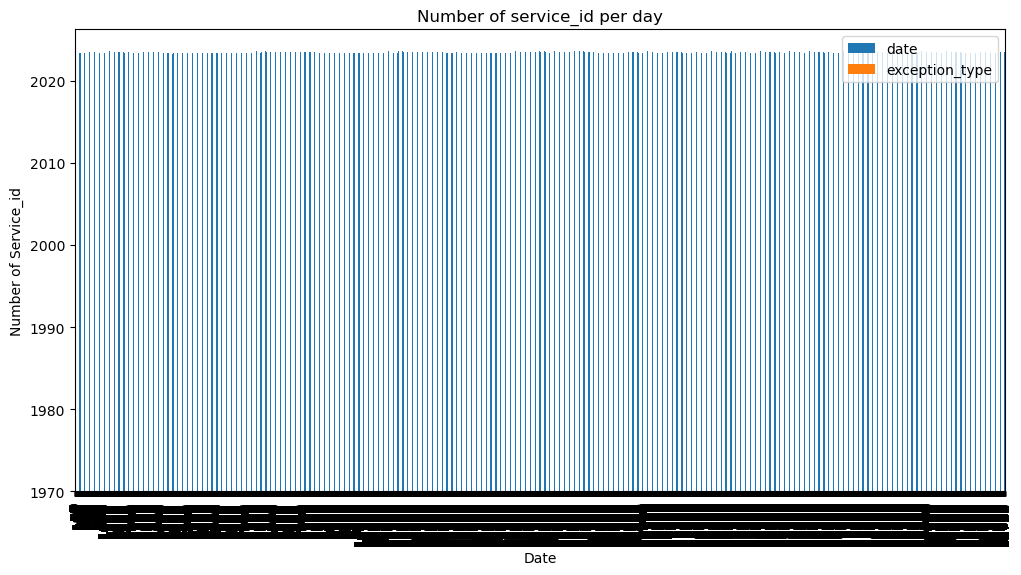

In [107]:
date_counts = calendar_dates.groupby('date')['service_id'].nunique().sort_values(ascending=False)

# plot the bar graph
calendar_dates.plot.bar(figsize=(12,6))
plt.title('Number of service_id per day')
plt.xlabel('Date')
plt.ylabel('Number of Service_id')
plt.show()

### Gráfico 10 - número de service_id por dia - filtrado por ano:

In [64]:
# Obtém todos os anos presentes no data frame
years = sorted(calendar_dates['date'].dt.year.unique())

# Cria o dropdown box com os anos
year_dropdown = widgets.Dropdown(options=years, description='Year:')

# Define a função que plota o gráfico para o ano selecionado
def plot_calendar_dates(year):
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    year_dates = calendar_dates.loc[(calendar_dates['date'] >= start_date) & (calendar_dates['date'] <= end_date)]
    date_counts = year_dates.groupby('date')['service_id'].nunique().sort_values(ascending=False)
    date_counts.plot.bar(figsize=(12,6))
    plt.title(f'Number of service_id per day in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Service_id')
    plt.show()

# Conecta a função ao evento de mudança do dropdown box
widgets.interactive(plot_calendar_dates, year=year_dropdown)


interactive(children=(Dropdown(description='Year:', options=(2022, 2023), value=2022), Output()), _dom_classes…

In [65]:
#Gerando o relatório exploratório do 'trips' em HTML

relatorio_calendar_dates = ProfileReport(calendar_dates, title='Relatorio calendar_dates')
relatorio_calendar_dates.to_file('calendar_dates.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>

- Esse é um Data Frame meramente de tradução, ele diz em que data aconteceram os service_id aconteceram
- O gráfico gerado não ficou legível em função da quantidade gigantesta de datas e de service_ids

## <span style="color:#6ea0f0">Criando e Explorando o Data Frame 'fare_df'</span>
* O dataframe fare_df é o merge entre os dataframes 'fare_attribute' e 'fare_rules'
* Com esse dataframe pretendemos descobrir quais são as tarifas para alguns 'route_id'

In [66]:
# Unir fare_attributes e fare_rules

fare_df = pd.merge(fare_attributes, fare_rules, on="fare_id")
fare_df

,fare_id,price,currency_type,payment_method,transfers,agency_id,route_id
0,21390,4.90,BRL,0,0,1049,c73df358-1a6d-4ff2-adf4-b1f3a1477344
1,21390,4.90,BRL,0,0,1049,1cf3a839-8147-4730-b0b6-5c52c4030a7b
2,21390,4.90,BRL,0,0,1049,142cbd21-198a-4b79-8bb6-755ef1eee5e7
3,21395,5.25,BRL,0,0,1049,72b3e29b-10df-4bce-854a-582d115a99a4
4,21395,5.25,BRL,0,0,1049,81399e03-dcaa-4255-858d-d3e81e69157d
5,21395,5.25,BRL,0,0,1049,90588e02-a842-4427-b7b1-6321737e7972
6,21398,6.00,BRL,0,0,1049,134ccc43-722d-433d-9e56-7bd03d985403
7,21412,5.40,BRL,0,0,1049,0e6d74dd-a14e-40b3-ac59-720498612889
8,21412,5.40,BRL,0,0,1049,5396e018-5cca-4291-8622-c50f2ac15b41
9,21394,5.50,BRL,0,0,1049,aa595240-5ef2-4e2d-a2f7-300976b1dcbf


In [67]:
print(f'O Data Frame tem {fare_df.shape[0]} linhas e {fare_df.shape[1]} colunas.')

O Data Frame tem 13 linhas e 7 colunas.


In [68]:
df_fare_route = pd.merge(fare_df, routes, on="route_id")
df_fare_route

,fare_id,price,currency_type,payment_method,transfers,agency_id_x,route_id,agency_id_y,route_short_name,route_long_name,route_type
0,21390,4.90,BRL,0,0,1049,c73df358-1a6d-4ff2-adf4-b1f3a1477344,1049,28,Mineirão,3
1,21390,4.90,BRL,0,0,1049,1cf3a839-8147-4730-b0b6-5c52c4030a7b,1049,20,Vila Carol,3
2,21390,4.90,BRL,0,0,1049,142cbd21-198a-4b79-8bb6-755ef1eee5e7,1049,45,Retiro São João,3
3,21395,5.25,BRL,0,0,1049,72b3e29b-10df-4bce-854a-582d115a99a4,1049,61,Iporanga,3
4,21395,5.25,BRL,0,0,1049,81399e03-dcaa-4255-858d-d3e81e69157d,1049,38,Aparecidinha Via Éden,3
5,21395,5.25,BRL,0,0,1049,90588e02-a842-4427-b7b1-6321737e7972,1049,56,Iguatemi,3
6,21398,6.00,BRL,0,0,1049,134ccc43-722d-433d-9e56-7bd03d985403,1049,08,Trujillo,3
7,21412,5.40,BRL,0,0,1049,0e6d74dd-a14e-40b3-ac59-720498612889,1049,64/3,P. Municipal Via Gal. Osório,3
8,21412,5.40,BRL,0,0,1049,5396e018-5cca-4291-8622-c50f2ac15b41,1049,03,Nova Esperança,3
9,21394,5.50,BRL,0,0,1049,aa595240-5ef2-4e2d-a2f7-300976b1dcbf,1049,55,Rodrigo,3


### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>

- Esse é um Data Frame criado a partir do merge entre os dois primeiros data frames, ele não está completo pois nem todos os route_ds estão contidos no data frame fare_rules

## <span style="color:#6ea0f0">Criando e Explorando o Data Frame 'shapes_trips'</span>
* O dataframe shapes_trips é o merge entre os dataframes 'shapes' e 'trips'
* Com esse dataframe pretendemos descobrir quais são as rotas para alguns 'shape_id'

In [69]:
# fazer o merge e selecionar as colunas desejadas
trips = trips.drop_duplicates(subset='shape_id')
shapes_trips = pd.merge(shapes, trips, on='shape_id', how='left')

shapes_trips.head()

,shape_id,shape_pt_lat,shape_pt_lon,route_id,service_id,trip_id,trip_headsign,direction_id
0,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45222,-47.50530,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230429,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,São Bento,0
1,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45262,-47.50570,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230429,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,São Bento,0
2,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45320,-47.50507,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230429,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,São Bento,0
3,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45288,-47.50475,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230429,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,São Bento,0
4,368d3558-ce36-41fd-9f62-8389be0f833d,-23.45253,-47.50436,659c7774-8dd9-4651-a12e-914c4e24f3d0,1001-53153-20230429,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,São Bento,0


In [70]:
print(f'O Data Frame tem {shapes_trips.shape[0]} linhas e {shapes_trips.shape[1]} colunas.')

O Data Frame tem 101613 linhas e 8 colunas.


In [71]:
shapes_trips.describe()

,shape_pt_lat,shape_pt_lon,direction_id
count,101613.000000,101613.000000,101613.000000
mean,-23.478081,-47.449801,0.440268
std,0.040143,0.047021,0.496422
min,-23.583650,-47.563070,0.000000
25%,-23.503910,-47.481910,0.000000
50%,-23.484330,-47.456630,0.000000
75%,-23.452790,-47.423640,1.000000
max,-23.352900,-47.282760,1.000000


In [72]:
shapes_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101613 entries, 0 to 101612
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   shape_id       101613 non-null  object 
 1   shape_pt_lat   101613 non-null  float64
 2   shape_pt_lon   101613 non-null  float64
 3   route_id       101613 non-null  object 
 4   service_id     101613 non-null  object 
 5   trip_id        101613 non-null  object 
 6   trip_headsign  101613 non-null  object 
 7   direction_id   101613 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 7.0+ MB


### Gráfico 11 - rotas de ônibus

In [91]:

# Criar o Dropdown com as opções de route_id
route_options = shapes_trips['route_id'].unique()
route_dropdown = widgets.Dropdown(options=route_options, description='Route ID')

# Função para traçar a rota no mapa
def plot_route(route_id):
    # Selecionar os dados para a route_id escolhida
    route_data = shapes_trips.loc[shapes_trips['route_id'] == route_id]

    # Criar o mapa com o centro na latitude e longitude médias
    center_lat = route_data['shape_pt_lat'].mean()
    center_lon = route_data['shape_pt_lon'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

    # Traçar a rota para cada trip_id
    for trip_id in route_data['trip_id'].unique():
        trip_data = route_data.loc[route_data['trip_id'] == trip_id]
        folium.PolyLine(locations=trip_data[['shape_pt_lat', 'shape_pt_lon']].values).add_to(m)

    # Exibir o mapa
    display(m)
    
    import time
    time.sleep(1)


# Definir a função para atualizar o gráfico ao selecionar uma nova route_id
def update_route(change):
    plot_route(change.new)
    m._repr_html_()

# Adicionar a função de atualização ao Dropdown
route_dropdown.observe(update_route, names='value')

# Exibir o Dropdown
display(route_dropdown)

# Exibir o mapa com a primeira opção selecionada
plot_route(route_options[0])


Dropdown(description='Route ID', options=('659c7774-8dd9-4651-a12e-914c4e24f3d0', 'af542db6-a91d-4240-8c89-fa8…

In [99]:
# Variável global para o mapa
m = None

# Função para traçar a rota no mapa
def plot_route(route_id):
    global m  # Tornar a variável global

    # Selecionar os dados para a route_id escolhida
    route_data = shapes_trips.loc[shapes_trips['route_id'] == route_id]

    # Criar o mapa com o centro na latitude e longitude médias
    center_lat = route_data['shape_pt_lat'].mean()
    center_lon = route_data['shape_pt_lon'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

    # Traçar a rota para cada trip_id
    for trip_id in route_data['trip_id'].unique():
        trip_data = route_data.loc[route_data['trip_id'] == trip_id]
        folium.PolyLine(locations=trip_data[['shape_pt_lat', 'shape_pt_lon']].values).add_to(m)

    # Exibir o mapa
    display(m)

# Criar o Dropdown com as opções de route_id
route_options = shapes_trips['route_id'].unique()
route_dropdown = widgets.Dropdown(options=route_options, description='Route ID')

# Definir a função para atualizar o gráfico ao selecionar uma nova route_id
def update_route(change):
    plot_route(change.new)

# Adicionar a função de atualização ao Dropdown
route_dropdown.observe(update_route, 'value')

# Exibir o Dropdown
display(route_dropdown)


Dropdown(description='Route ID', options=('659c7774-8dd9-4651-a12e-914c4e24f3d0', 'af542db6-a91d-4240-8c89-fa8…

In [132]:
#Gerando o relatório exploratório do 'trips' em HTML

relatorio_shapes_trips = ProfileReport(shapes_trips, title='Relatorio shapes_trips')
relatorio_shapes_trips.to_file('shapes_trips.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\marcf\anaconda3\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <div style="background-color:#226C35; color:#FFFFFF; padding:10px">Conclusões:</div>

- Esse é um Data Frame criado a partir do merge entre os data frames shapes e trips
- O data frame ainda é um data frame intermediário mas podemos gierar dados como uma rota de uma linha de ônibus de uma forma gráfica em um mapa. 

## <span style="color:#6ea0f0">Criando e Explorando o Data Frame 'stops_full'</span>
* O dataframe stops_full é o merge entre os dataframes 'stop_times' e 'stops'
* Com esse dataframe pretendemos descobrir quais são as paradas e tempo em que elas aconteceram por um trip_id

In [77]:
stops_full = pd.merge(stop_times, stops, on='stop_id')
stops_full.head(10)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type
0,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:40:00,23:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
1,368d3558-ce36-41fd-9f62-8389be0f833d_96538600,20:20:00,20:20:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
2,368d3558-ce36-41fd-9f62-8389be0f833d_96538477,08:40:00,08:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
3,368d3558-ce36-41fd-9f62-8389be0f833d_93997326,00:50:00,00:50:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
4,368d3558-ce36-41fd-9f62-8389be0f833d_94321540,20:20:00,20:20:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
5,368d3558-ce36-41fd-9f62-8389be0f833d_94321541,08:40:00,08:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
6,368d3558-ce36-41fd-9f62-8389be0f833d_119991174,08:40:00,08:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
7,368d3558-ce36-41fd-9f62-8389be0f833d_119991175,20:20:00,20:20:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
8,368d3558-ce36-41fd-9f62-8389be0f833d_120792854,00:40:00,00:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0
9,368d3558-ce36-41fd-9f62-8389be0f833d_98900175,08:40:00,08:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.45308,-47.505257,0


In [90]:
print(f'O Data Frame tem {stops_full.shape[0]} linhas e {stops_full.shape[1]} colunas.')

O Data Frame tem 1167385 linhas e 9 colunas.


In [91]:
stops_full.describe()

,stop_sequence,stop_lat,stop_lon,location_type
count,1.167385e+06,1.167385e+06,1.167385e+06,1167385.0
mean,2.943186e+01,-2.347850e+01,-4.746125e+01,0.0
std,2.148284e+01,3.429707e-02,4.027616e-02,0.0
min,1.000000e+00,-2.358308e+01,-4.756302e+01,0.0
25%,1.300000e+01,-2.350403e+01,-4.748835e+01,0.0
50%,2.600000e+01,-2.348467e+01,-4.746774e+01,0.0
75%,4.100000e+01,-2.345308e+01,-4.744104e+01,0.0
max,1.670000e+02,-2.335322e+01,-4.728297e+01,0.0


In [92]:
stops_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167385 entries, 0 to 1167384
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   trip_id         1167385 non-null  object        
 1   arrival_time    1167385 non-null  datetime64[ns]
 2   departure_time  1167385 non-null  datetime64[ns]
 3   stop_id         1167385 non-null  object        
 4   stop_sequence   1167385 non-null  int64         
 5   stop_name       1167385 non-null  object        
 6   stop_lat        1167385 non-null  float64       
 7   stop_lon        1167385 non-null  float64       
 8   location_type   1167385 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 89.1+ MB


In [99]:
df_trip_id_filter = stops_full.loc[stops_full['trip_id'] == '368d3558-ce36-41fd-9f62-8389be0f833d_92960947']
df_trip_id_filter

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type
0,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:40:00,2023-05-11 23:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.453080,-47.505257,0
4713,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:41:39,2023-05-11 23:41:39,032dcd58-6609-11ed-98db-5adc55d213d0,2,"Estr. do Dinorah, 404 - Lot. Dinora Rosa, Soro...",-23.448650,-47.504444,0
6454,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:42:42,2023-05-11 23:42:42,032e526c-6609-11ed-98db-5adc55d213d0,3,"Estr. do Dinorah, 97-109 - Lot. Dinora Rosa, S...",-23.445818,-47.504887,0
7828,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:43:56,2023-05-11 23:43:56,032eba14-6609-11ed-98db-5adc55d213d0,4,"Avenida Vinícius de Moraes, 201",-23.442480,-47.505320,0
8612,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:45:36,2023-05-11 23:45:36,032f8569-6609-11ed-98db-5adc55d213d0,5,"Av. Vinícius de Moraes, 501-549 - Parque São B...",-23.437971,-47.505177,0
9112,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:46:47,2023-05-11 23:46:47,033000ed-6609-11ed-98db-5adc55d213d0,6,"Av. Vinícius de Moraes, 911 - Parque São Bento...",-23.434866,-47.506096,0
9612,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:47:49,2023-05-11 23:47:49,03306740-6609-11ed-98db-5adc55d213d0,7,"Avenida Vinícius de Moraes, 1151",-23.432160,-47.506880,0
10112,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:48:40,2023-05-11 23:48:40,0330d1ce-6609-11ed-98db-5adc55d213d0,8,"Av. Vinícius de Moraes, 1401-1495 - Parque São...",-23.429897,-47.507500,0
10612,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:49:17,2023-05-11 23:49:17,03311b69-6609-11ed-98db-5adc55d213d0,9,"Avenida Vinícius de Moraes, 1619",-23.428253,-47.507970,0
11112,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,2023-05-11 23:49:42,2023-05-11 23:49:42,03311cb1-6609-11ed-98db-5adc55d213d0,10,"Rua Odilon Walter, 792-856 - Parque São Bento,...",-23.428200,-47.509200,0


In [87]:
# Convertendo as strings de horários em objetos datetime

stops_full['arrival_time'] = pd.to_datetime(stops_full['arrival_time'].astype(str))
stops_full['departure_time'] = pd.to_datetime(stops_full['departure_time'].astype(str))

### Gráfico 12 - rotas de ônibus e tempo de cada ônibus

In [88]:

# Criar o Dropdown com as opções de trip_id
trip_options = stops_full['trip_id'].unique()
trip_dropdown = widgets.Dropdown(options=trip_options, description='Trip ID')

# Função para traçar a rota no mapa
def plot_route(trip_id):
    # Selecionar os dados para a trip_id escolhida
    trip_data = stops_full.loc[stops_full['trip_id'] == trip_id]

    # Criar o mapa com o centro na latitude e longitude médias
    center_lat = trip_data['stop_lat'].mean()
    center_lon = trip_data['stop_lon'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

    # Adicionar os marcadores de parada com o arrival_time
    for index, row in trip_data.iterrows():
        folium.Marker(location=[row['stop_lat'], row['stop_lon']],
                      popup=row['stop_name'] + ' - ' + row['arrival_time']).add_to(m)

    # Traçar a rota
    folium.PolyLine(locations=trip_data[['stop_lat', 'stop_lon']].values).add_to(m)

    # Exibir o mapa
    display(m)

# Definir a função para atualizar o gráfico ao selecionar uma nova trip_id
def update_trip(change):
    plot_route(change.new)

# Adicionar a função de atualização ao Dropdown
trip_dropdown.observe(update_trip, names='value')

# Exibir o Dropdown
display(trip_dropdown)

# Exibir o mapa com a primeira opção selecionada
plot_route(trip_options[0])


Dropdown(description='Trip ID', options=('368d3558-ce36-41fd-9f62-8389be0f833d_92960947', '368d3558-ce36-41fd-…

TypeError: can only concatenate str (not "Timestamp") to str

In [84]:
#Gerando o relatório exploratório do 'stops_full' em HTML

relatorio_stops_full = ProfileReport(stops_full, title='Relatorio stops_full')
relatorio_stops_full.to_file('stops_full.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\marcf\anaconda3\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## <span style="color:#6ea0f0">Criando e Explorando o Data Frame 'stops_full_merged'</span>
* O dataframe stops_full_merged é o merge entre os dataframes 'stops_full' e 'stop_times_grouped'(esse data frame foi criado durante a exploração do data frame stop_times)
* Com esse dataframe pretendemos descobrir quais são as paradas e o tempo total de uma viagem por um trip_id

In [79]:
stops_full_merged = stops_full.merge(stop_times_grouped, on='trip_id', how='inner')
stops_full_merged.head()

,trip_id,arrival_time_x,departure_time_x,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,location_type,departure_time_y,arrival_time_y,total_travel_time
0,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:40:00,23:40:00,032d12a4-6609-11ed-98db-5adc55d213d0,1,Rua Comendador Genésio Rodrigues Sorocaba - Sã...,-23.453080,-47.505257,0,23:40:00,23:52:45,12.75
1,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:41:39,23:41:39,032dcd58-6609-11ed-98db-5adc55d213d0,2,"Estr. do Dinorah, 404 - Lot. Dinora Rosa, Soro...",-23.448650,-47.504444,0,23:40:00,23:52:45,12.75
2,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:42:42,23:42:42,032e526c-6609-11ed-98db-5adc55d213d0,3,"Estr. do Dinorah, 97-109 - Lot. Dinora Rosa, S...",-23.445818,-47.504887,0,23:40:00,23:52:45,12.75
3,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:43:56,23:43:56,032eba14-6609-11ed-98db-5adc55d213d0,4,"Avenida Vinícius de Moraes, 201",-23.442480,-47.505320,0,23:40:00,23:52:45,12.75
4,368d3558-ce36-41fd-9f62-8389be0f833d_92960947,23:45:36,23:45:36,032f8569-6609-11ed-98db-5adc55d213d0,5,"Av. Vinícius de Moraes, 501-549 - Parque São B...",-23.437971,-47.505177,0,23:40:00,23:52:45,12.75


In [93]:
print(f'O Data Frame tem {stops_full_merged.shape[0]} linhas e {stops_full_merged.shape[1]} colunas.')

O Data Frame tem 1167385 linhas e 12 colunas.


In [94]:
stops_full_merged.describe()

,stop_sequence,stop_lat,stop_lon,location_type,total_travel_time
count,1.167385e+06,1.167385e+06,1.167385e+06,1167385.0,1.167385e+06
mean,2.943186e+01,-2.347850e+01,-4.746125e+01,0.0,3.059603e+01
std,2.148284e+01,3.429707e-02,4.027616e-02,0.0,1.568805e+01
min,1.000000e+00,-2.358308e+01,-4.756302e+01,0.0,1.283333e+00
25%,1.300000e+01,-2.350403e+01,-4.748835e+01,0.0,1.796667e+01
50%,2.600000e+01,-2.348467e+01,-4.746774e+01,0.0,2.718333e+01
75%,4.100000e+01,-2.345308e+01,-4.744104e+01,0.0,3.925000e+01
max,1.670000e+02,-2.335322e+01,-4.728297e+01,0.0,1.122833e+02


In [95]:
stops_full_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167385 entries, 0 to 1167384
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1167385 non-null  object 
 1   arrival_time_x     1167385 non-null  object 
 2   departure_time_x   1167385 non-null  object 
 3   stop_id            1167385 non-null  object 
 4   stop_sequence      1167385 non-null  int64  
 5   stop_name          1167385 non-null  object 
 6   stop_lat           1167385 non-null  float64
 7   stop_lon           1167385 non-null  float64
 8   location_type      1167385 non-null  int64  
 9   departure_time_y   1167385 non-null  object 
 10  arrival_time_y     1167385 non-null  object 
 11  total_travel_time  1167385 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 115.8+ MB


In [ ]:
df_trip_id_filter = stops_full.loc[stops_full['trip_id'] == '368d3558-ce36-41fd-9f62-8389be0f833d_92960947']
df_trip_id_filter

### Gráfico 13 - rotas de ônibus, tempo de chegada e tempo total de viagem:

In [80]:
# Criar o Dropdown com as opções de trip_id
trip_options = stops_full_merged['trip_id'].unique()
trip_dropdown = widgets.Dropdown(options=trip_options, description='Trip ID')

# Função para traçar a rota no mapa
def plot_route(trip_id):
    # Selecionar os dados para a trip_id escolhida
    trip_data = stops_full_merged.loc[stops_full_merged['trip_id'] == trip_id]

    # Criar o mapa com o centro na latitude e longitude médias
    center_lat = trip_data['stop_lat'].mean()
    center_lon = trip_data['stop_lon'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

    # Adicionar os marcadores de parada com o total_travel_time
    for index, row in trip_data.iterrows():
        popup = f"{row['stop_name']} - {row['arrival_time_x'].strftime('%H:%M:%S')}"
        folium.Marker(location=[row['stop_lat'], row['stop_lon']], popup=popup).add_to(m)

    # Traçar a rota
    folium.PolyLine(locations=trip_data[['stop_lat', 'stop_lon']].values).add_to(m)
    
     # Calcular o tempo total da viagem
    total_time = trip_data.iloc[-1]['total_travel_time']
    total_time_str = f"Tempo total de viagem: {total_time}"

   # Adicionar a caixa de diálogo com o tempo total no canto superior direito
    total_time_dialog = folium.map.Marker(
        [center_lat + 0.005, center_lon + 0.005], 
        icon=folium.Icon(color='white'), 
        popup=folium.map.Popup(total_time_str, max_width=200, show=True),
        ).add_to(m)
    
    # Exibir o mapa
    display(m)


# Definir a função para atualizar o gráfico ao selecionar uma nova trip_id
def update_trip(change):
    plot_route(change.new)

# Adicionar a função de atualização ao Dropdown
trip_dropdown.observe(update_trip, names='value')

# Exibir o Dropdown
display(trip_dropdown)

# Exibir o mapa com a primeira opção selecionada
plot_route(trip_options[0])

Dropdown(description='Trip ID', options=('368d3558-ce36-41fd-9f62-8389be0f833d_92960947', '368d3558-ce36-41fd-…

## <span style="color:#6ea0f0">Criando e Explorando o Data Frame 'stops_full_merged_trips'</span>
* O dataframe stops_full_merged_trips é o merge entre os dataframes 'stops_full_merged' e 'shapes_trips'.
* Com esse dataframe pretendemos descobrir informações sobre rotas e viagens por pontos

In [97]:
# Fazer o merge dos data frames stops_full_merged e shapes_trips pelo trip_id
stops_full_merged_trips = stops_full_merged.merge(shapes_trips, on='trip_id')
stops_full_merged_trips.head()

MemoryError: Unable to allocate 1.44 GiB for an array with shape (193627227,) and data type int64